In [1]:
import numpy as np
from copy import deepcopy

In [2]:
test = ['7,1',
        '11,1',
        '11,7',
        '9,7',
        '9,5',
        '2,5',
        '2,3',
        '7,3']

In [3]:
def get_red_tiles(data):
    red_tiles = []
    for line in data:
        x,y = line.strip().split(',')
        red_tiles.append([int(x),int(y)])
    return np.array(red_tiles)

def get_areas(red_tiles):
    max_area = 0
    all_areas = []
    indexes = []
    for i in range(0, len(red_tiles)-1):
        for j in range(i+1, len(red_tiles)):
            area = abs(red_tiles[i][0]-red_tiles[j][0]+1) * abs(red_tiles[i][1]-red_tiles[j][1]+1)
            all_areas.append(area)
            indexes.append([i,j])
    all_areas = np.array(all_areas)
    indexes = np.array(indexes)
    return all_areas, indexes

def segments_intersect(L1, L2):
    x1 = L1[0][0]
    x2 = L1[1][0]
    y1 = L1[0][1]
    y2 = L1[1][1]

    x3 = L2[0][0]
    x4 = L2[1][0]
    y3 = L2[0][1]
    y4 = L2[1][1]

    denom = ((x1-x2)*(y3-y4)) - ((y1-y2)*(x3-x4))

    t = ((x1-x3)*(y3-y4))-((y1-y3)*(x3-x4))
    t /= denom
    u = ((x1-x2)*(y1-y3)) - ((y1-y2)*(x1-x3))
    u *= -1
    u /= denom

    if 0 <= t and t <= 1:
        if 0 <= u and u <= 1:
            return True
    return False

def np_in(needle, haystack):
    for hay in haystack:
        if needle[0] == hay[0] and needle[1] == hay[1]:
            return True
    return False

def check_corners_inside(red_tiles, green_tiles, indexes, mid):   
    c = np.array([[red_tiles[int(indexes[0]),0], red_tiles[int(indexes[1]),1]],
                  [red_tiles[int(indexes[1]),0], red_tiles[int(indexes[0]),1]]] )

    for i in range(0, len(c)):
        copy_tiles = deepcopy(red_tiles)
        if np_in(c[i], red_tiles):
            continue
        if np_in(c[i], green_tiles):
            continue
        
        if c[i][0] < mid[0]:
            idx0 = np.where(red_tiles[:,0] < c[i][0])[0]
        else:
            idx0 = np.where(red_tiles[:,0] > c[i][0])[0]
        if len(idx0) == 0:
            return False

        if c[i][1] < mid[1]:
            idx1 = np.where(red_tiles[:,1] < c[i][1])[0]
        else:
            idx1 = np.where(red_tiles[:,1] > c[i][1])[0]
        idx = np.intersect1d(idx0, idx1)
        if len(idx) == 0:
            return False

    return True

def check_edges_inside(red_tiles, green_tiles, indexes):
    min_x = np.min(red_tiles[indexes,0])
    max_x = np.max(red_tiles[indexes,0])
    min_y = np.min(red_tiles[indexes,1])
    max_y = np.max(red_tiles[indexes,1])
    
    idx = np.where(green_tiles[:,0] > min_x)[0]
    green_tiles = green_tiles[idx]
    idx = np.where(green_tiles[:,0] < max_x)[0]
    green_tiles = green_tiles[idx]
    idx = np.where(green_tiles[:,1] > min_y)[0]
    green_tiles = green_tiles[idx]
    idx = np.where(green_tiles[:,1] < max_y)[0]
    green_tiles = green_tiles[idx]

    if len(green_tiles) == 0:
        return True
    return False

def max_green_area(red_tiles, all_areas, indexes):
    argsort = np.argsort(all_areas)[::-1]

    green_tiles = []

    for i in range(0, len(red_tiles)):
        j = i+1
        if j == len(red_tiles):
            j = 0
            
        min_x = np.min(red_tiles[[i,j],0])
        max_x = np.max(red_tiles[[i,j],0])
        min_y = np.min(red_tiles[[i,j],1])
        max_y = np.max(red_tiles[[i,j],1])
        for x in range(min_x, max_x+1):
            for y in range(min_y, max_y+1):
                green_tiles.append([x,y])
    green_tiles = np.array(green_tiles)

    mid = [(np.max(green_tiles[:,0])-np.min(green_tiles[:,0])) + np.min(green_tiles[:,0]),
           (np.max(green_tiles[:,1])-np.min(green_tiles[:,1])) + np.min(green_tiles[:,1])]

    for idx in argsort:
        ##Check all corners are inside area
        #if check_corners_inside(red_tiles, green_tiles, indexes[idx], mid):
        #Check no edges are inside rectangle
        if check_edges_inside(red_tiles, deepcopy(green_tiles), indexes[idx]):
            return all_areas[idx]
    return -1
    

def run_part(data, part=1):
    red_tiles = get_red_tiles(data)
    all_areas, indexes = get_areas(red_tiles)

    if part == 1:
         return np.max(all_areas)
    elif part == 2:
        return max_green_area(red_tiles, all_areas, indexes)

    return

In [4]:
print('Part 1 test:', run_part(test), run_part(test)==50)

Part 1 test: 50 True


In [5]:
with open('input_day09.txt', 'r') as f:
    data = f.readlines()
    f.close()

print('Part 1 result:', run_part(data)) #4763040296

Part 1 result: 4763040296


In [6]:
print('Part 2 test:', run_part(test, 2), run_part(test, 2)==24)

Part 2 test: 24 True


In [7]:
with open('input_day09.txt', 'r') as f:
    data = f.readlines()
    f.close()
print('Part 2 result:', run_part(data, 2)) #1396463530 too low, 4633889290 wrong...

Part 2 result: 1396463530


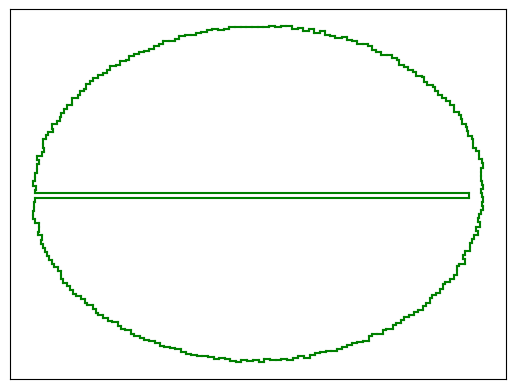

In [8]:
import matplotlib.pyplot as plt
red_tiles = get_red_tiles(data)
for i in range(0, len(red_tiles)):
    a = i
    b = i+1
    if b == len(red_tiles):
        b = 0

    plt.plot([red_tiles[a][0],red_tiles[b][0]], [red_tiles[a][1],red_tiles[b][1]], 'g')

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)
plt.show()